In [1]:
import os
print("=================================切换目录=====================================")
print(os.getcwd()) # 打印当前工作目录
os.chdir('/home/shichaoyu/perl5/OAG1/dataset/')
print(os.getcwd())
print(os.listdir())

=================================切换目录=====================================
/home/shichaoyu/perl5/OAG1
/home/shichaoyu/perl5/OAG1/dataset
['train', 'result', 'sna_test_data', '.ipynb_checkpoints']


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

训练集同名数量： 221
消歧后实际作者数量： 22839


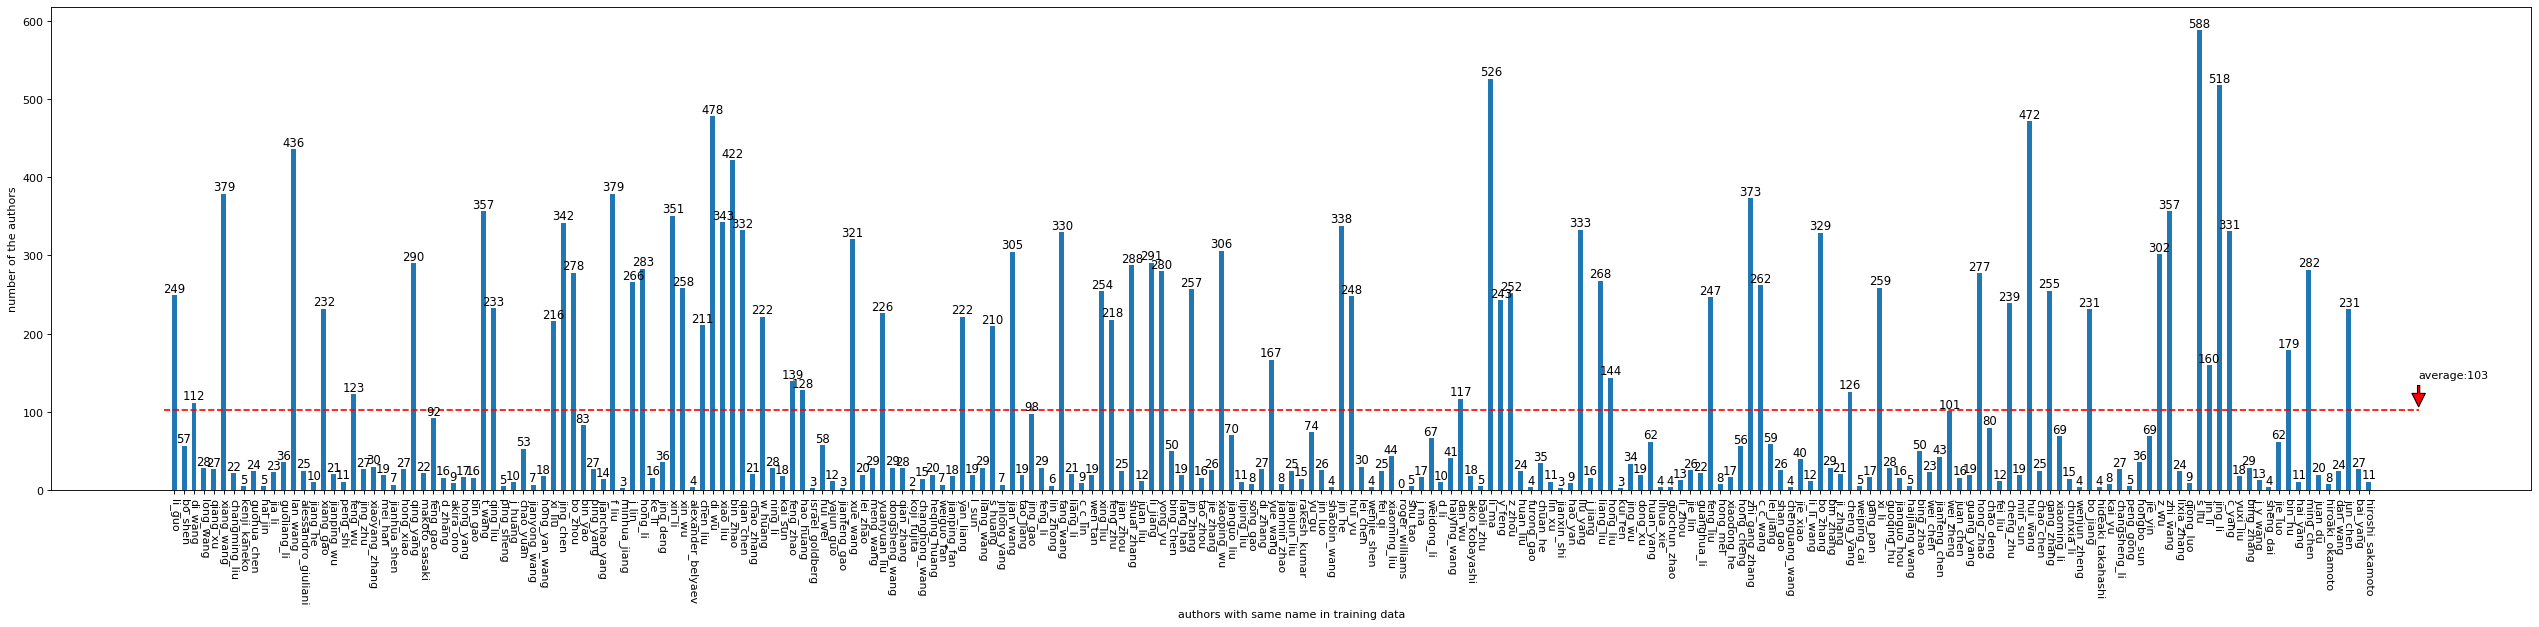

In [6]:
# 训练集分析
train_row_data_path = 'train/train_author.json'
train_pub_data_path = 'train/train_pub.json'

train_pub_data = json.load(open(train_pub_data_path, 'r', encoding='utf-8'))
train_data = json.load(open(train_row_data_path, 'r', encoding='utf-8'))
authors = [author for author in train_data]
authors_num_person = [len(train_data[author].keys()) for author in train_data] 

print('训练集同名数量：', len(authors))
print('消歧后实际作者数量：',  sum(authors_num_person))

# 绘制训练集同名作者个体数量
plt.figure(figsize=(40, 8), dpi=80)
x = range(len(authors))

plt.bar(x, authors_num_person, width=0.5)
plt.xticks(x, authors)
plt.xticks(rotation=270) 
plt.xlabel('authors with same name in training data')
plt.ylabel('number of the authors')
for xl, yl in zip(x, authors_num_person):
    plt.text(xl, yl+0.3, str(yl), ha='center', va='bottom', fontsize=10.5) 

mean_person = int(np.mean(authors_num_person))
plt.gca().hlines(mean_person,-1,225,linestyles='--',colors='red',label='average')
plt.annotate(u"average:" + str(mean_person), xy = (225, mean_person), xytext = (225, mean_person+40),arrowprops=dict(facecolor='red',shrink=0.1,width=2))

plt.show()

# print(len(authors))
# for author in train_data:
#     author_ids = train_data[author].keys()
#     print(author)
#     print(len(author_ids))

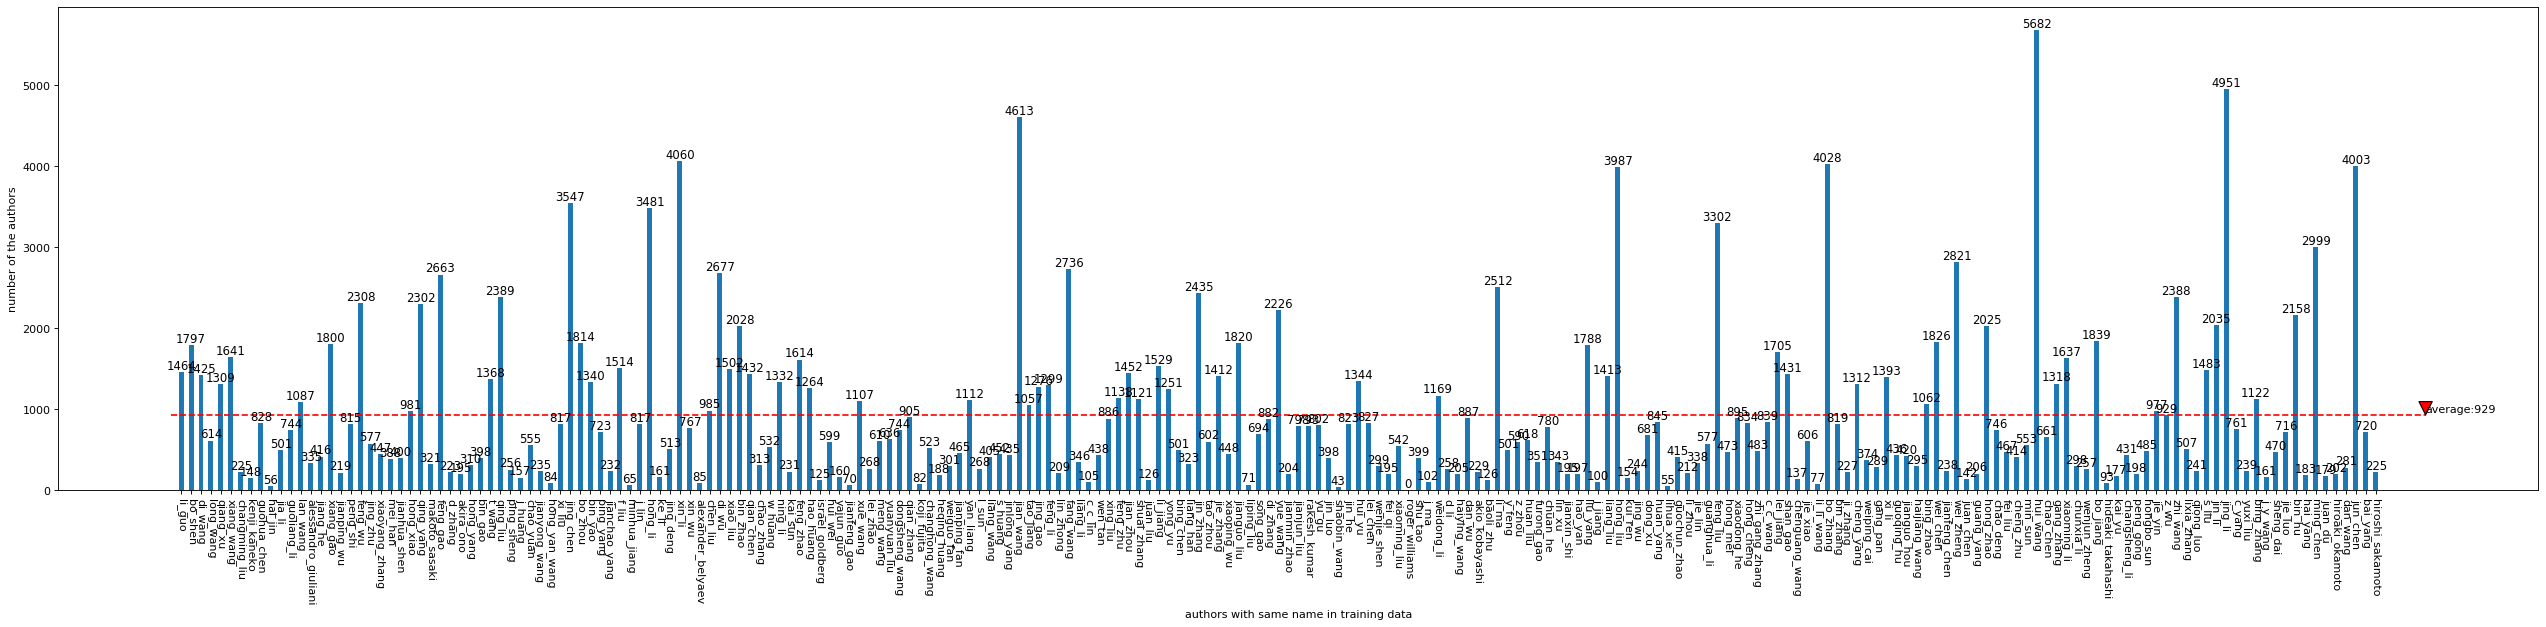

In [7]:
# 绘制训练集同名作者论文总数
authors_num_papers = []
for author in train_data:
    num = 0
    for author_id in train_data[author]:
        papers = train_data[author][author_id]
        num += len(papers)    
    authors_num_papers.append(num)
        
plt.figure(figsize=(40, 8), dpi=80)
x = range(len(authors))

plt.bar(x, authors_num_papers, width=0.5)
plt.xticks(x, authors)
plt.xticks(rotation=270) 
plt.xlabel('authors with same name in training data')
plt.ylabel('number of the authors')
for xl, yl in zip(x, authors_num_papers):
    plt.text(xl, yl+0.3, str(yl), ha='center', va='bottom', fontsize=10.5) 

mean_person = int(np.mean(authors_num_papers))
plt.gca().hlines(mean_person,-1,225,linestyles='--',colors='red',label='average')
plt.annotate(u"average:" + str(mean_person), xy = (225, mean_person), xytext = (225, mean_person+40),arrowprops=dict(facecolor='red',shrink=0.1,width=2))

plt.show()

同名作者数量： 50
涉及的论文数： 41052
平均论文数量： 821.04
提供的论文数： 40977


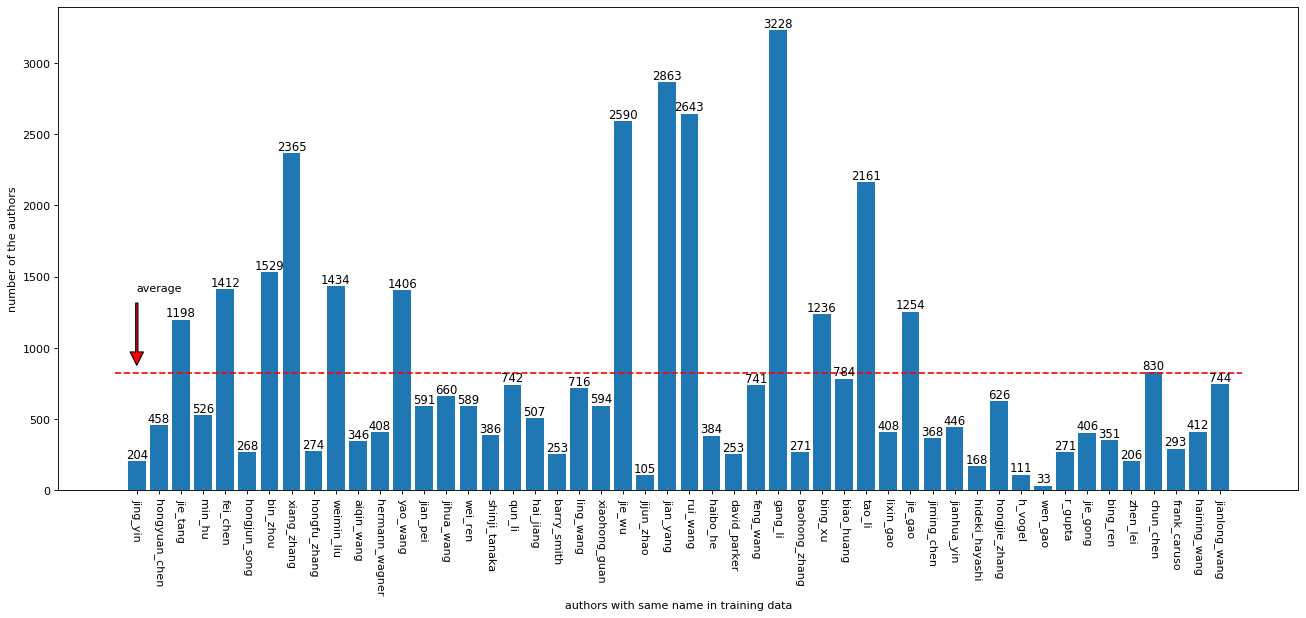

In [8]:
valid_row_data_path = 'sna_test_data/sna_test_author_raw.json'
valid_pub_data_path = 'sna_test_data/test_pub_sna.json'

# 合并数据
validate_pub_data = json.load(open(valid_pub_data_path, 'r', encoding='utf-8'))
validate_data = json.load(open(valid_row_data_path, 'r', encoding='utf-8'))
merge_data = {}
for author in validate_data: 
    validate_data[author] = [validate_pub_data[paper_id] for paper_id in validate_data[author]] 

# 验证集数据分析
authors = validate_data.keys()
papers_perauthor = [len(validate_data[author]) for author in validate_data]
print('同名作者数量：', len(authors))
print('涉及的论文数：', np.sum(papers_perauthor))
print('平均论文数量：', np.mean(papers_perauthor))
print('提供的论文数：',len(validate_pub_data))

# 绘制同名作者论文数量
plt.figure(figsize=(20, 8), dpi=80)
x = range(len(authors))

plt.bar(x, papers_perauthor, width=0.8)
plt.xticks(x, authors)
plt.xticks(rotation=270) 
plt.xlabel('authors with same name in training data')
plt.ylabel('number of the authors')
for xl, yl in zip(x, papers_perauthor):
    plt.text(xl, yl+0.3, str(yl), ha='center', va='bottom', fontsize=10.5) 
    
plt.gca().hlines(np.mean(papers_perauthor),-1,50,linestyles='--',colors='red',label='average')
plt.annotate(u"average", xy = (0, np.mean(papers_perauthor)), xytext = (0, 1400),arrowprops=dict(facecolor='red',shrink=0.1,width=2))

plt.show()

In [7]:
import re
# 数据预处理

# 预处理名字
def precessname(name):   
    name = name.lower().replace(' ', '_')
    name = name.replace('.', '_')
    name = name.replace('-', '')
    name = re.sub(r"_{2,}", "_", name) 
    return name

# 预处理机构,简写替换，
def preprocessorg(org):
    if org != "":
        org = org.replace('Sch.', 'School')
        org = org.replace('Dept.', 'Department')
        org = org.replace('Coll.', 'College')
        org = org.replace('Inst.', 'Institute')
        org = org.replace('Univ.', 'University')
        org = org.replace('Lab ', 'Laboratory ')
        org = org.replace('Lab.', 'Laboratory')
        org = org.replace('Natl.', 'National')
        org = org.replace('Comp.', 'Computer')
        org = org.replace('Sci.', 'Science')
        org = org.replace('Tech.', 'Technology')
        org = org.replace('Technol.', 'Technology')
        org = org.replace('Elec.', 'Electronic')
        org = org.replace('Engr.', 'Engineering')
        org = org.replace('Aca.', 'Academy')
        org = org.replace('Syst.', 'Systems')
        org = org.replace('Eng.', 'Engineering')
        org = org.replace('Res.', 'Research')
        org = org.replace('Appl.', 'Applied')
        org = org.replace('Chem.', 'Chemistry')
        org = org.replace('Prep.', 'Petrochemical')
        org = org.replace('Phys.', 'Physics')
        org = org.replace('Phys.', 'Physics')
        org = org.replace('Mech.', 'Mechanics')
        org = org.replace('Mat.', 'Material')
        org = org.replace('Cent.', 'Center')
        org = org.replace('Ctr.', 'Center')
        org = org.replace('Behav.', 'Behavior')
        org = org.replace('Atom.', 'Atomic')
        org = org.split(';')[0]  # 多个机构只取第一个
    return org
import re
import nltk
import numpy
import string
import sys
from textblob import TextBlob
from textblob import Word
from collections import defaultdict
#正则去标点
def etl(content):
    content = re.sub("[\s+\.\!\/,;$%^*(+\"\')]+|[+——()?【】“”！，。？、~@#￥%……&*（）]+", " ", content)
    content = re.sub(r" {2,}", " ", content)
    content=content.lower()
    return content

def get_org(co_authors, author_name):
    for au in co_authors:
        name = precessname(au['name'])
        name = name.split('_')
        if ('_'.join(name) == author_name or '_'.join(name[::-1]) == author_name) and 'org' in au:
            return au['org']
    return ''

In [9]:
# 3. 无监督聚类（根据合作者和机构TFIDF进行相似度聚类） 线上得分：0.2637
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer

def disambiguate_by_cluster():
    res_dict = {}
    for author in validate_data:
        print(author)
        coauther_orgs = []
        papers = validate_data[author]
        if len(papers) == 0:
            res_dict[author] = []
            continue
        print(len(papers))
        paper_dict = {}
        for paper in papers:
            authors = paper['authors'] 
            names = [precessname(paper_author['name']) for paper_author in authors]
            orgs = [preprocessorg(paper_author['org']) for paper_author in authors if 'org' in paper_author]  
            abstract = paper["abstract"] if 'abstract' in paper else ''
            coauther_orgs.append(etl(' '.join(names + orgs) + ' '+ abstract))         
        tfidf = TfidfVectorizer().fit_transform(coauther_orgs)
        # sim_mertric = pairwise_distances(tfidf, metric='cosine')
        
        clf = DBSCAN(eps=0.5815,min_samples=1,metric='cosine')
        s = clf.fit_predict(tfidf)
        #每个样本所属的簇 
        for label, paper in zip(clf.labels_, papers):
            if str(label) not in paper_dict:
                paper_dict[str(label)] = [paper['id']]
            else:
                paper_dict[str(label)].append(paper['id']) 
        res_dict[author] = list(paper_dict.values())
    json.dump(res_dict, open('result/disambiguate_by_cluster_result15.json', 'w', encoding='utf-8'), indent=4)

disambiguate_by_cluster()

jing_yin
204
hongyuan_chen
458
jie_tang
1198
min_hu
526
fei_chen
1412
hongjun_song
268
bin_zhou
1529
xiang_zhang
2365
hongfu_zhang
274
weimin_liu
1434
aiqin_wang
346
hermann_wagner
408
yao_wang
1406
jian_pei
591
jihua_wang
660
wei_ren
589
shinji_tanaka
386
qun_li
742
hai_jiang
507
barry_smith
253
ling_wang
716
xiaohong_guan
594
jie_wu
2590
jijun_zhao
105
jian_yang
2863
rui_wang
2643
haibo_he
384
david_parker
253
feng_wang
741
gang_li
3228
baohong_zhang
271
bing_xu
1236
biao_huang
784
tao_li
2161
lixin_gao
408
jie_gao
1254
jiming_chen
368
jianhua_yin
446
hideki_hayashi
168
hongjie_zhang
626
h_vogel
111
wen_gao
33
r_gupta
271
jie_gong
406
bing_ren
351
zhen_lei
206
chun_chen
830
frank_caruso
293
haining_wang
412
jianlong_wang
744


In [37]:
!pip install textblob

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 645kB 61kB/s eta 0:00:011


In [41]:
%whos

Variable                  Type         Data/Info
------------------------------------------------
DBSCAN                    type         <class 'sklearn.cluster.dbscan_.DBSCAN'>
TextBlob                  type         <class 'textblob.blob.TextBlob'>
TfidfVectorizer           type         <class 'sklearn.feature_e<...>on.text.TfidfVectorizer'>
Word                      type         <class 'textblob.blob.Word'>
author                    str          jianlong_wang
author_id                 str          3qn5CxG9
authors                   dict_keys    dict_keys(['jing_yin', 'h<...>_wang', 'jianlong_wang'])
authors_num_papers        list         n=221
authors_num_person        list         n=221
defaultdict               type         <class 'collections.defaultdict'>
disambiguate_by_cluster   function     <function disambiguate_by<...>luster at 0x2b262c983560>
etl                       function     <function etl at 0x2b262c983680>
expected_str              Word         i
get_org             